## Final Project Submission

Please fill out:
* Student name: Mark Muriithi
* Student pace:  full time
* Scheduled project review date/time: 
* Instructor name: Asha Deen
* Blog post URL:


# ANALYSIS OF THE MOVIE INDUSTRY FOR EXPANSION.

## 1. Introduction.

## 1.1 Business Problem

##### M company has decide to expand into the movie Industry and knows nothing about. As the lead data analyst, I have been tasked with Analyzing various datasets from various companies on the best approach that will bring constant revenue and profit. The analysis will provide better decision making processes. 

## 1.2 Business objectives

##### 1. Which movies bring most revenue
##### 2. which genres are preffered
##### 3. Which languages are preffered

## 1.3 Limitation of Datasets
##### We are operating under the assumption that the dataset is accurate with the required information required to make an informed decision

## 2.0 Data Understanding and Analysis

##### We are going to look at how our datasets looks like and explore them.We are going to analyze the datasets required for our objective 

##### we are going to look ata datasets from IMDB, The Numbers,The Movie db, Box Office Mojo and the database im.db

In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# loading the database
conn = sqlite3.connect('im.db')

# Check available tables (optional, good for understanding structure)
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [5]:
# checking the table movie basics from the database
q = ("""SELECT *
FROM movie_basics;""")
movie_basics_df = pd.read_sql_query(q, conn)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
# checking the table movie ratings from the database
q = ("""SELECT *
FROM movie_ratings;""")
movie_ratings_df = pd.read_sql_query(q, conn)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [7]:
# merging both the mavie basics and movie ratings into one dataframe
movie_df = pd.merge(movie_basics_df, movie_ratings_df, on='movie_id', how='inner')
movie_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [8]:
# Renaming the primary title for ease of analysis
movie_df=movie_df.rename(columns={'primary_title': 'movie'})

In [9]:
# Loading the numbers dataset for budgets of movies
tn_df = pd.read_csv('tn.movie_budgets.csv')
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [10]:
# checking for missing values
tn_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [11]:
# Loading the movie database
tmdb_df = pd.read_csv('tmdb.movies.csv')
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [12]:
#Checking for missing values
tmdb_df.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [13]:
#loading the Box Office magic dataset
bom_df = pd.read_csv('bom.movie_gross.csv')
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [14]:
# Checking for missing values 
bom_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [15]:
# Rename title column to movie
bom_df = bom_df.rename(columns={'title': 'movie'})


In [16]:
# Getting relevant columns hence no need for cleaning the missing values
relc_bom_df = bom_df[['movie', 'studio']]
relc_bom_df.head()

,movie,studio
0,Toy Story 3,BV
1,Alice in Wonderland (2010),BV
2,Harry Potter and the Deathly Hallows Part 1,WB
3,Inception,WB
4,Shrek Forever After,P/DW


In [17]:
# merge the movie dataframe with the numbers dataframe using movie = title
tmdb_tn_df = pd.merge(tmdb_df, tn_df, left_on='title', right_on='movie')
tmdb_tn_df.head(10)

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,30,"Mar 26, 2010",How to Train Your Dragon,"$165,000,000","$217,581,232","$494,870,992"
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995",Toy Story,"$30,000,000","$191,796,233","$364,545,516"
3,2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,37,"Nov 22, 1995",Toy Story,"$30,000,000","$191,796,233","$364,545,516"
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,17,"Feb 12, 2010",Percy Jackson & the Olympians: The Lightning T...,"$95,000,000","$88,768,303","$223,050,874"
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,50,"Jul 9, 2010",Despicable Me,"$69,000,000","$251,513,985","$543,464,573"
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635,47,"Nov 5, 2010",Megamind,"$130,000,000","$148,415,853","$321,887,208"


In [18]:
# Getting relevant collumns for ease of analysis
relc_tmdb_tn_df = tmdb_tn_df[['original_language', 'movie', 'production_budget', 'worldwide_gross']]
relc_tmdb_tn_df.head()

,original_language,movie,production_budget,worldwide_gross
0,en,How to Train Your Dragon,"$165,000,000","$494,870,992"
1,en,Iron Man 2,"$170,000,000","$621,156,389"
2,en,Toy Story,"$30,000,000","$364,545,516"
3,en,Toy Story,"$30,000,000","$364,545,516"
4,en,Inception,"$160,000,000","$835,524,642"


In [19]:
# merging the above dataframe with the box office dataframe using movie
relc_tmdb_tn_bom_df = pd.merge(relc_tmdb_tn_df, relc_bom_df, on='movie')
relc_tmdb_tn_bom_df.head()


,original_language,movie,production_budget,worldwide_gross,studio
0,en,How to Train Your Dragon,"$165,000,000","$494,870,992",P/DW
1,en,Iron Man 2,"$170,000,000","$621,156,389",Par.
2,en,Inception,"$160,000,000","$835,524,642",WB
3,en,Toy Story 3,"$200,000,000","$1,068,879,522",BV
4,en,Despicable Me,"$69,000,000","$543,464,573",Uni.


In [20]:
# Checking for missing values
relc_tmdb_tn_bom_df.isna().sum()

original_language    0
movie                0
production_budget    0
worldwide_gross      0
studio               1
dtype: int64

In [21]:
#dropping row with misssing value as it is statistically insignificant
relc_tmdb_tn_bom_df.dropna(subset=['studio'], inplace= True)

In [22]:
# merging the above dataframe with the movie dataframe 
df_movie = pd.merge(relc_tmdb_tn_bom_df, movie_df, on='movie')
df_movie.head()

,original_language,movie,production_budget,worldwide_gross,studio,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,en,How to Train Your Dragon,"$165,000,000","$494,870,992",P/DW,tt0892769,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation",8.1,611299
1,en,Iron Man 2,"$170,000,000","$621,156,389",Par.,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
2,en,Inception,"$160,000,000","$835,524,642",WB,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
3,en,Toy Story 3,"$200,000,000","$1,068,879,522",BV,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
4,en,Despicable Me,"$69,000,000","$543,464,573",Uni.,tt1323594,Despicable Me,2010,95.0,"Animation,Comedy,Family",7.7,464511


In [23]:
#checking for missing values
df_movie.isna().sum()

original_language     0
movie                 0
production_budget     0
worldwide_gross       0
studio                0
movie_id              0
original_title        0
start_year            0
runtime_minutes      38
genres               11
averagerating         0
numvotes              0
dtype: int64

In [24]:
# Dropping rows with missing genre values and replacing missing runtime minutes with avererage runtime minutes
movie_df.dropna(subset=['genres'], inplace= True)
runtime_minutes_gross = movie_df['runtime_minutes'].median()
movie_df['runtime_minutes'].fillna(runtime_minutes_gross, inplace=True)

In [25]:
# Recheck for misiing values
movie_df.isna().sum()

movie_id           0
movie              0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [ ]:
# TO NOTE
# The data was relatively clean with not a lot of missing infomation

In [26]:
# save to a csv file
df_movie.to_csv("C:/Users/HP/Desktop/p2/dsc-phase-2-project-v3/cleaned_data.csv")

## 3. Visualisations
##### Here we are going to use charts to see how our analyse our data further

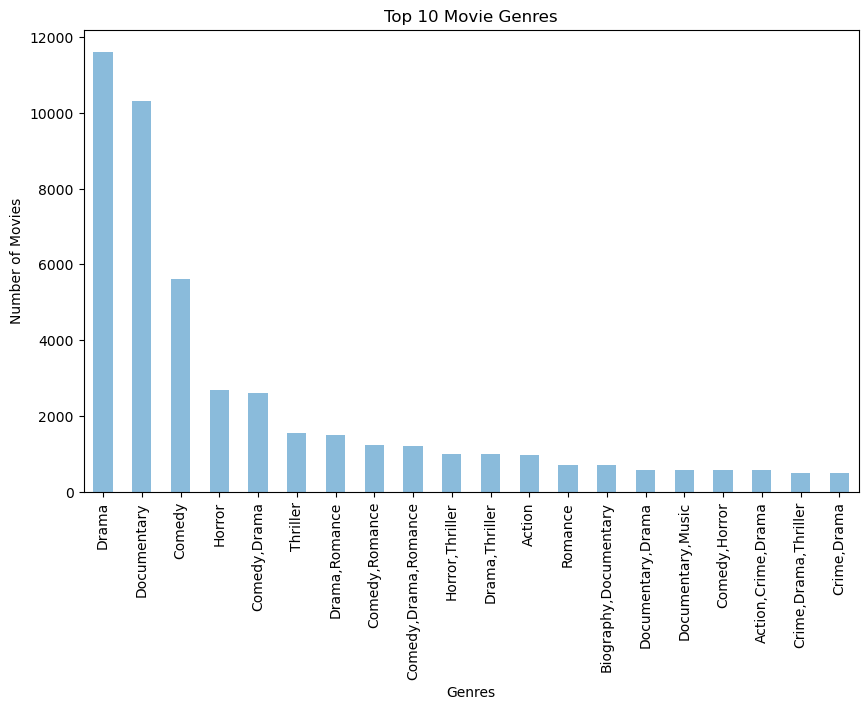

In [50]:
# Bar Chart of  which genre is most used
plt.figure(figsize=(10, 6))
movie_df['genres'].value_counts().head(20).plot(kind='bar')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.savefig("C:/Users/HP/Pictures/top 10 movie genres.png", dpi=300, bbox_inches='tight')
plt.show()

##### We can observe that Drama, Documentary, Comedy and Horror dominate ass the genres with the most popular with a high number of movies.
##### Drama seems to be the most dominant even when mixed with other genres

In [28]:
# Grouping the top 10 genres with their averages.
top_10_genre_by_ratings = movie_df.groupby('genres')['averagerating'].mean().nlargest(15).reset_index()
top_10_genre_by_ratings.columns = ['Genres', 'Average Rating']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


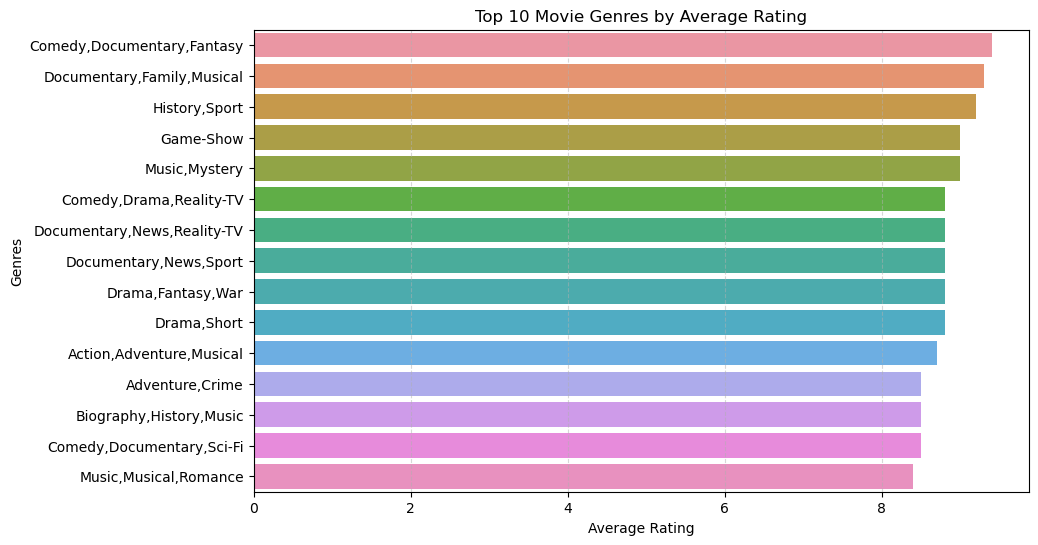

In [51]:
# plotting the top 10  genres by their average rating
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_genre_by_ratings, x='Average Rating', y='Genres')
plt.title('Top 10 Movie Genres by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend().remove()
plt.savefig("C:/Users/HP/Pictures/top 10 movies by average rating.png", dpi=300, bbox_inches='tight')
plt.show()

##### Here we see that most of the top genres are above an 8 rating with comedy documentary and drama leading with highest rating


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


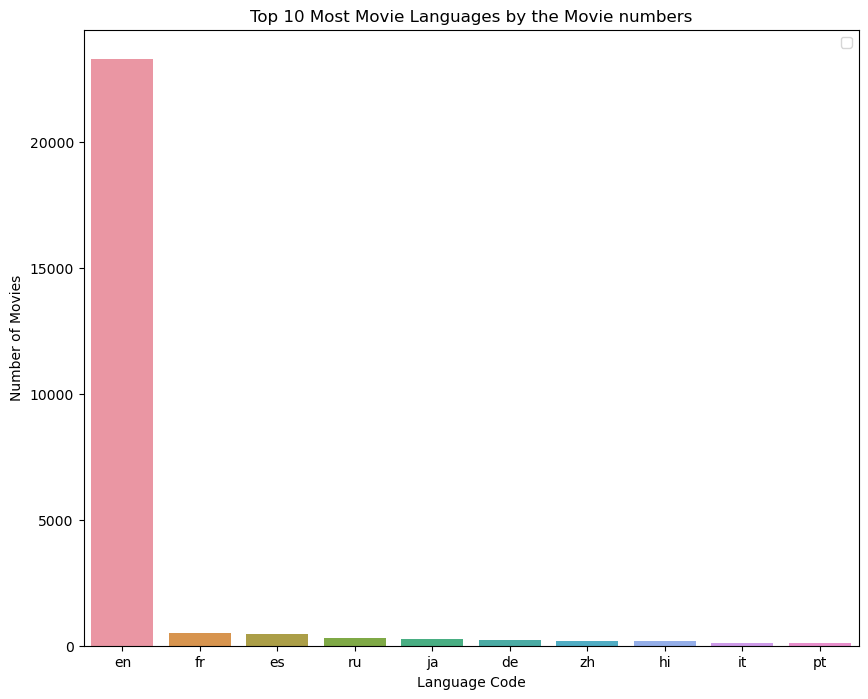

In [52]:
# Here we chwck 
language_counts = tmdb_df['original_language'].value_counts().head(10)

# Create the plot
plt.figure(figsize=(10, 8))
sns.set_palette('Blues_d')
ax = sns.barplot(x=language_counts.index, y=language_counts.values)

# Customize the plot
plt.title('Top 10 Most Movie Languages by the Movie numbers')
plt.xlabel('Language Code')
plt.ylabel('Number of Movies')
plt.legend()
plt.savefig("C:/Users/HP/Pictures/top 10 movie languages by numbers.png", dpi=300, bbox_inches='tight')
plt.show()

##### Abbreviation for language code are:
##### 1. en - English
##### 2. fr - French
##### 3. es = Spanish
##### 4. Ru - Rusiia
##### 5. ja - Japanese
##### 6. de - German
##### 7. zh - Chinese
##### 8. hi - Hindi
##### 9. it - Italian
##### 10. pt - Portuguese

##### The above graph shows that English dominates as the most prefered for making movies. Folllowed by French, Spanish,Russian and Japanese.

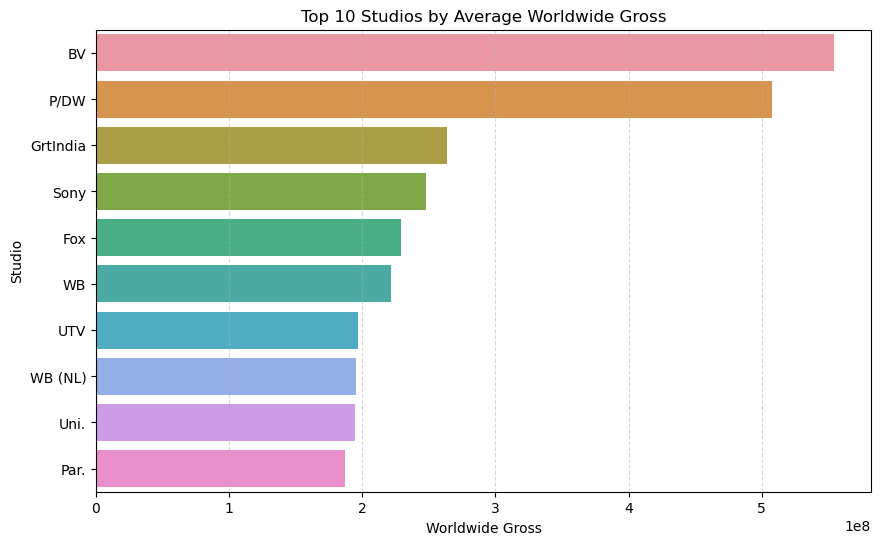

In [53]:
# Clean the 'worldwide_gross' column
df_movie['worldwide_gross'] = df_movie['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# top 10 studios by average domestic gross
top_10_studios_domestic = df_movie.groupby('studio')['worldwide_gross'].mean().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_studios_domestic, x='worldwide_gross', y='studio')
plt.title('Top 10 Studios by Average Worldwide Gross')
plt.xlabel('Worldwide Gross')
plt.ylabel('Studio')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.savefig("C:/Users/HP/Pictures/top 10 studios by average worlwide gross.png", dpi=300, bbox_inches='tight')
plt.show()

##### Abbreviations for Studio are:
##### 1. BV - BV Studios
##### 2. P/DW - Deutsche Welle
##### 3. WB - Warner Brothers Studio
##### 4. UTV - UTV productions
##### 5. WB(NL) - Warner Brothers Netherlands
##### 6. Uni - Universal studios
##### 7. Par - Paramount Studios
##### The rest are just as they are.

##### Here BV, Deutsch Welle, And Warner Brothers Have the highest revenue overall. It may indicate tey have deep pockets to make high end movies but  
##### may have high budget productions. It may also indicate most movies are made by them

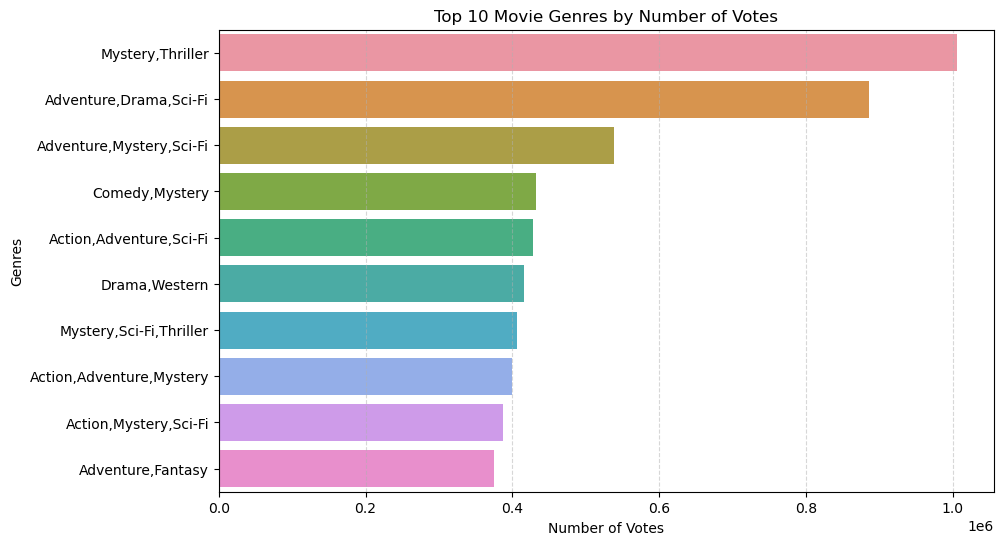

In [49]:
# plot top 10 movie genres by number of votes
top_10_genre_votes = df_movie.groupby('genres')['numvotes'].mean().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_genre_votes, x='numvotes', y='genres')
plt.title('Top 10 Movie Genres by Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Genres')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.savefig("C:/Users/HP/Pictures/top 10 movie genres by number of votes.png", dpi=300, bbox_inches='tight')
plt.show()

#####  The graph shows movies that are Mystery, Thriler, Adventure, Sci-Fi, Comedy and Action represent the most liked and popular genres

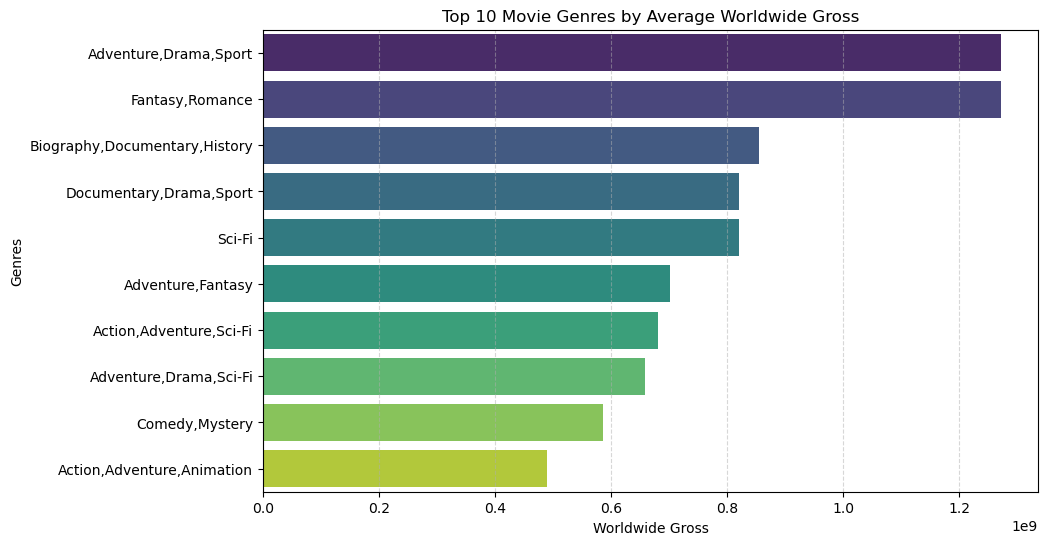

In [48]:
# plot top 10 unique value genres by their average worldwide gross
top_10_genres_worldwide = df_movie.groupby('genres')['worldwide_gross'].mean().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_genres_worldwide, x='worldwide_gross', y='genres', palette='viridis')
plt.title('Top 10 Movie Genres by Average Worldwide Gross')
plt.xlabel('Worldwide Gross')
plt.ylabel('Genres')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.savefig("C:/Users/HP/Pictures/top 10 movie genres by average worlwide gross.png", dpi=300, bbox_inches='tight')
plt.show()

##### From the graph above Adventure, Drama, Sport, Fantasy and Romance lead with highest grossing genres in the world

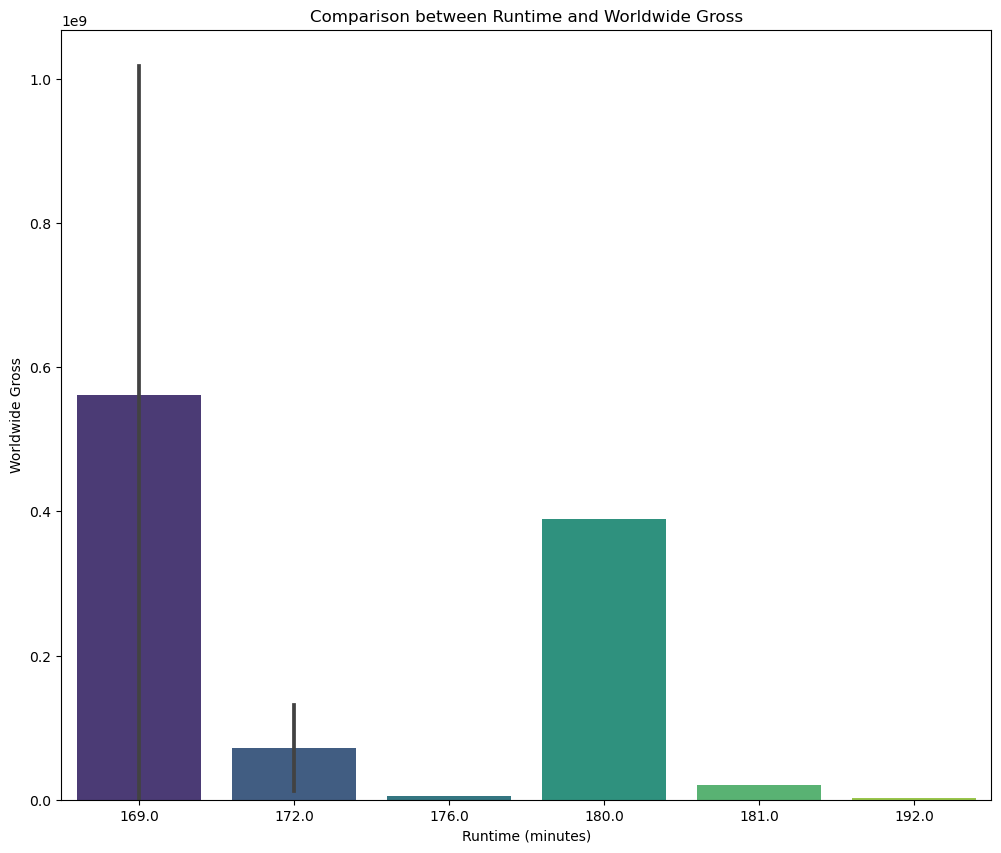

In [54]:
# bar chart to show relation between top 10 runtime_minutes and worldwide_gross
top_10_runtime = df_movie.nlargest(10, 'runtime_minutes')
plt.figure(figsize=(12, 10))
sns.barplot(data=top_10_runtime, x='runtime_minutes', y='worldwide_gross', palette='viridis')
plt.xlabel('Runtime (minutes)')
plt.xticks()
plt.ylabel('Worldwide Gross')
plt.title('Comparison between Runtime and Worldwide Gross')
plt.savefig("C:/Users/HP/Pictures/Comparison between runtime and worlwide gross.png", dpi=300, bbox_inches='tight')
plt.show()

##### Runtime minutes does not really affect the success of a movie

# SUMMARY

##### Factors influencing a succesful business in the movie industry are like genre, ratings, language, budget etc.
##### English is most preferd as it makes the most movies with genres like drama, documentary, and sports being popular
##### Also the movies that are popular and highly rated tend to gross well as they have low budget needs.
##### Higher ratings doesn't mean that a genre is more popular or vice versa. Or in any case will yield better returns 

## RECOMMENDATIONS

##### 1. A hybrid with different genres produce better revenue
##### 2. Its better to produce movies in different languages and subtitle to cater for a wider audience
##### 3. Low budget movies like Drama bring more revenue as they do not require a lot to produce